In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Run again with validation split at 0.2

In [2]:
sz=320
bs = 32
path='data/hackerearth-myntra'
arch=dn121

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [5]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.trn_dl))


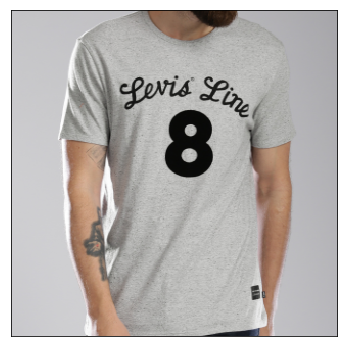

In [6]:
show_img(data.trn_ds.denorm(to_np(x))[5],figsize=(6,6))

In [7]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2,opt_fn=optim.Adamax)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████▏ | 1389/1709 [00:22<00:05, 62.59it/s, loss=4.95]

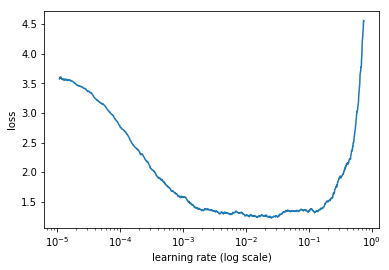

In [8]:
lrf = learn.lr_find()
learn.sched.plot()

In [9]:
learn.fit(0.0005,15)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

  9%|▉         | 153/1709 [00:02<00:28, 55.30it/s, loss=1.59]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                     
    0      1.135177   1.022678   0.699401  
    1      1.009453   0.959837   0.719626                      
    2      0.939115   0.924086   0.725759                      
    3      0.893893   0.914982   0.727804                      
    4      0.855595   0.890347   0.734813                      
    5      0.81295    0.881544   0.737223                      
    6      0.821414   0.876501   0.7408                        
    7      0.795222   0.871046   0.742918                      
    8      0.694816   0.866427   0.745254                      
    9      0.714697   0.869874   0.745984                      
    10     0.646239   0.867186   0.747371                      
    11     0.607183   0.864397   0.750292                      
    12     0.616679   0.864495   0.751241                      
    13     0.582418   0.871959   0.748394                      
    14     0.552305   0.873056   0.749781                    

[0.87305593, 0.74978095794392519]

In [10]:
learn.fit(0.0002,10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.499219   0.867388   0.750511  
    1      0.525359   0.869214   0.75219                       
    2      0.50262    0.874869   0.751752                      
    3      0.457693   0.876322   0.753724                      
    4      0.465878   0.879207   0.753724                      
    5      0.463039   0.8865     0.754089                      
    6      0.46707    0.886478   0.754016                      
    7      0.447904   0.882931   0.753432                      
    8      0.429561   0.885581   0.754089                      
    9      0.382347   0.887604   0.75387                       



[0.88760388, 0.75386974299065423]

In [ ]:
learn.fit(0.002,2)

In [ ]:
learn.fit(0.005,4)

In [ ]:
learn.fit(0.001,5)

In [ ]:
learn.fit(0.0005,4)

In [ ]:
learn.fit(0.0001,4)

In [11]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization      
[[ 132   10    1    1    3    9   22   30   66    0   13    4   26    0    1   42    1    0   18    5    7
     1   62    0]
 [   1   57    0    0    0    1    1    1   19    0    4    1    5    0    0    1    2    0    0    2    0
     0   28    1]
 [   3    0   22    0    1    0    2    0    8    0    0    0    0    0    0    3    0    0    1    0    0
     0    5    0]
 [   2    0    0   31    0    0    0    1    1    0    0    0    0    0    0    8    0    0    3    0    0
     0    0    0]
 [   2    1    0    0  290    1    0    3    5    0    1    0    0    0    0  149    1    0   41    0    0
     0   19    0]
 [  13    3    1    0    0  116   13   27   26    0   10    1    2    0    0   16    0    0    2    2    0
     0   39    1]
 [   8    2    0    0    0    6  197    7   31    0    2    1    5    0    0   16    0    0    5    2    1
     0   24    0]
 [  25    0    1    1    5   20    8  221   15    0    2    2    0    1    0   

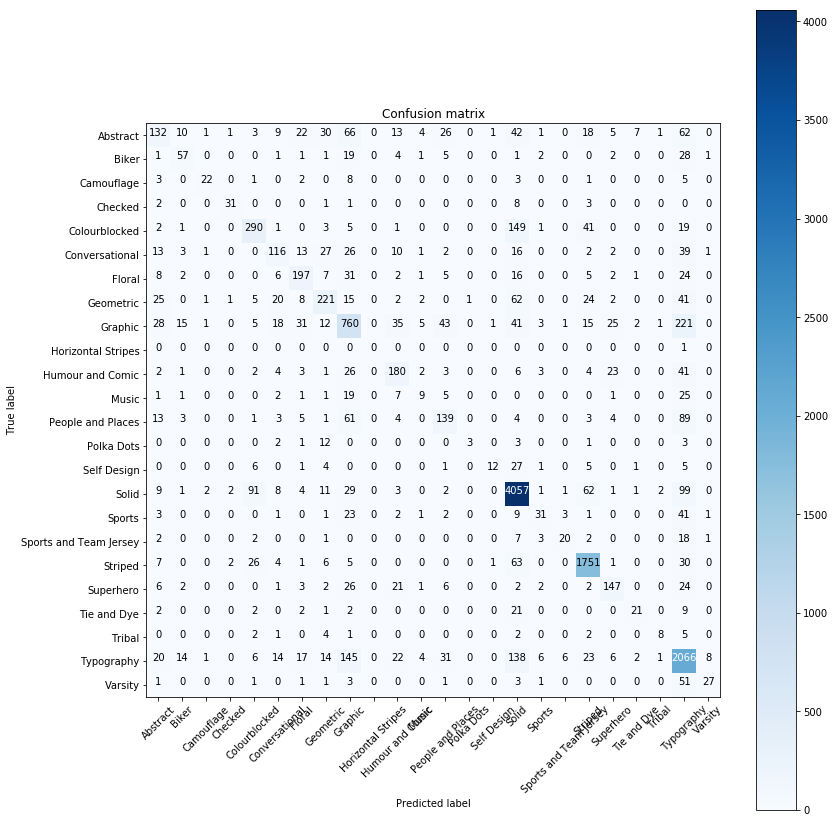

In [12]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)
y[10]=9
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.29075  0.02203  0.0022   0.0022   0.00661  0.01982  0.04846  0.06608  0.14537  0.       0.02863  0.00881
   0.05727  0.       0.0022   0.09251  0.0022   0.       0.03965  0.01101  0.01542  0.0022   0.13656  0.     ]
 [ 0.00806  0.45968  0.       0.       0.       0.00806  0.00806  0.00806  0.15323  0.       0.03226  0.00806
   0.04032  0.       0.       0.00806  0.01613  0.       0.       0.01613  0.       0.       0.22581  0.00806]
 [ 0.06667  0.       0.48889  0.       0.02222  0.       0.04444  0.       0.17778  0.       0.       0.       0.
   0.       0.       0.06667  0.       0.       0.02222  0.       0.       0.       0.11111  0.     ]
 [ 0.04348  0.       0.       0.67391  0.       0.       0.       0.02174  0.02174  0.       0.       0.       0.
   0.       0.       0.17391  0.       0.       0.06522  0.       0.       0.       0.       0.     ]
 [ 0.0039   0.00195  0.       0.       0.5653   0.00195  0.       0.00585  0.00975  0.       0.001

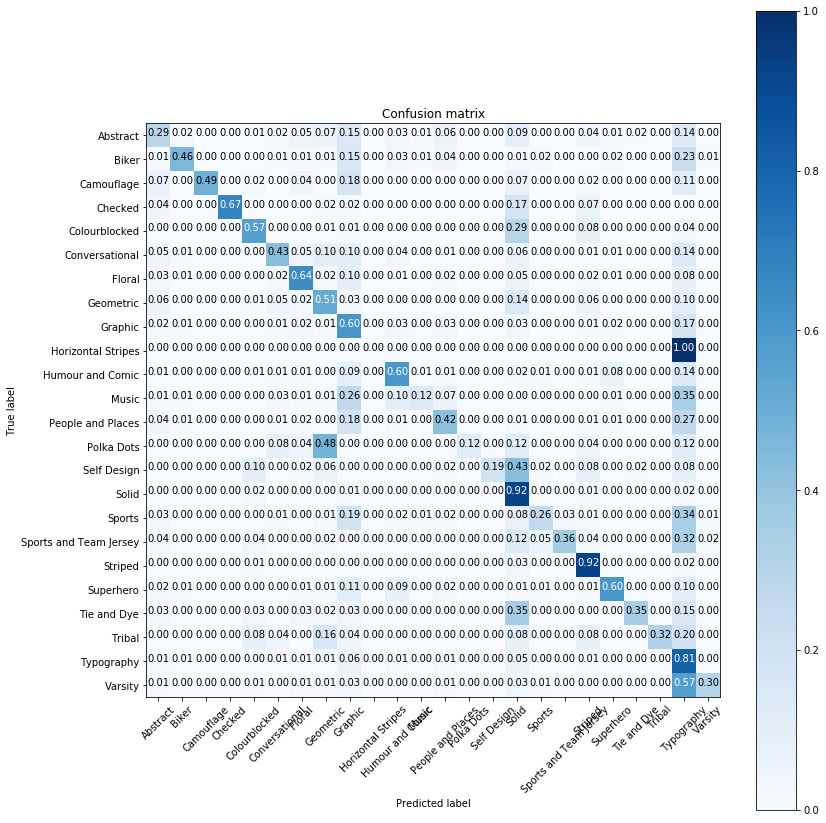

In [13]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [14]:
arch_201=dn201

In [15]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [16]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [18]:
learn_201 = ConvLearner.pretrained(arch_201,data,precompute=True,ps=0.2,opt_fn=optim.Adamax)


100%|██████████| 428/428 [03:21<00:00,  2.13it/s]


In [20]:
lrf = learn_201.lr_find()
learn.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 14%|█▍        | 241/1709 [00:03<00:20, 70.31it/s, loss=2.73]

Exception in thread Thread-35:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 82%|████████▏ | 1395/1709 [00:19<00:04, 71.03it/s, loss=5.01]


AttributeError: 'LossRecorder' object has no attribute 'plot'

 82%|████████▏ | 1395/1709 [00:33<00:07, 41.93it/s, loss=5.01]

In [21]:
learn_201.fit(0.0002,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.199103   1.086769   0.690129  
    1      1.063146   0.999138   0.709769                     
    2      0.983788   0.958182   0.717947                      
    3      0.881985   0.937957   0.724956                      
    4      0.869582   0.914593   0.728899                      



[0.91459328, 0.72889894859813087]

In [22]:
learn_201.fit(0.0001,10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.860271   0.904277   0.734886  
    1      0.822162   0.89228    0.734667                      
    2      0.763283   0.892577   0.735178                      
    3      0.768781   0.882138   0.738245                      
    4      0.734401   0.879349   0.737807                      
    5      0.732638   0.878075   0.7408                        
    6      0.726949   0.872942   0.741603                      
    7      0.713751   0.86719    0.74321                       
    8      0.709043   0.867984   0.744232                      
    9      0.68748    0.864099   0.742699                      



[0.86409897, 0.74269859813084116]

In [ ]:
learn_201.fit(0.005,2)

In [ ]:
learn_201.fit(0.0001,5)

In [ ]:
learn_201.fit(0.0005,2)

In [ ]:
learn_201.fit(0.0005,2)

In [ ]:
learn_201.fit(0.0001,2)

In [23]:
log_preds_201,y_201 = learn_201.TTA()
probs_201 = np.mean(np.exp(log_preds_201),0)
accuracy_np(probs_201, y_201)
y_201[10]=9
predictions_201 = np.argmax(probs_201,axis=1)
cm_201 = confusion_matrix(y_201, predictions_201)


Confusion matrix, without normalization
[[ 120    3    0    1    2   16   30   29   67    0   10    0   24    0    0   41    6    0   17    6    5
     1   76    0]
 [   2   59    0    0    0    1    1    0   16    0    1    0    5    0    0    2    0    0    0    2    0
     0   35    0]
 [   5    0   19    0    0    0    4    0    4    0    0    0    0    0    0    3    0    0    2    0    0
     0    8    0]
 [   2    0    0   24    0    0    0    5    0    0    0    0    0    0    0   10    0    0    5    0    0
     0    0    0]
 [   2    0    0    0  276    1    0    2    3    0    1    0    0    0    0  170    0    0   35    0    0
     0   23    0]
 [  14    0    0    0    1  127   18   20   32    0    8    0    2    0    0    9    0    0    1    3    0
     0   37    0]
 [  15    0    0    0    0   10  193    7   21    0    4    0    3    0    0   15    0    0    3    0    0
     1   35    0]
 [  24    0    1    2    6   21    8  202   20    0    0    0    0    0    2   62    

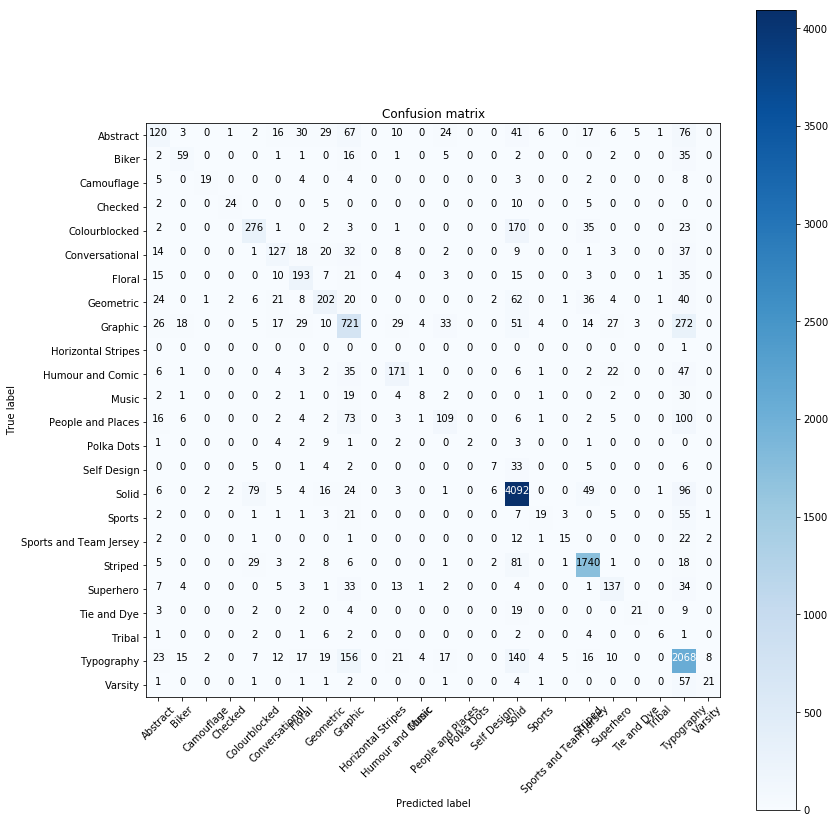

In [24]:
plot_confusion_matrix_mine(cm_201,data.classes,normalize=False)

In [25]:
probs_ensemble = probs_201 + probs

In [26]:
probs_ensemble[:2]

array([[ 0.00029,  0.00004,  0.00028,  0.00008,  0.00011,  0.0023 ,  0.00022,  0.00212,  0.00055,  0.     ,
         0.00015,  0.00008,  0.00008,  0.00012,  0.00116,  1.98382,  0.00007,  0.00001,  0.00032,  0.00027,
         0.00011,  0.00005,  0.00662,  0.00113],
       [ 0.00613,  0.00025,  0.00019,  0.00008,  0.004  ,  0.01022,  0.00335,  0.00151,  0.00236,  0.00002,
         0.00145,  0.00155,  0.00221,  0.00037,  0.00135,  1.92157,  0.00017,  0.00001,  0.00733,  0.00176,
         0.01122,  0.00046,  0.01774,  0.0047 ]], dtype=float32)

In [27]:
probs_ensemble = probs_ensemble/2

In [28]:
probs_ensemble[:2]

array([[ 0.00014,  0.00002,  0.00014,  0.00004,  0.00005,  0.00115,  0.00011,  0.00106,  0.00028,  0.     ,
         0.00008,  0.00004,  0.00004,  0.00006,  0.00058,  0.99191,  0.00004,  0.     ,  0.00016,  0.00014,
         0.00006,  0.00003,  0.00331,  0.00057],
       [ 0.00307,  0.00013,  0.0001 ,  0.00004,  0.002  ,  0.00511,  0.00168,  0.00075,  0.00118,  0.00001,
         0.00072,  0.00078,  0.00111,  0.00019,  0.00067,  0.96079,  0.00009,  0.00001,  0.00366,  0.00088,
         0.00561,  0.00023,  0.00887,  0.00235]], dtype=float32)

In [29]:
accuracy_np(probs_ensemble, y)


0.7655838454784899

In [30]:
accuracy_np(probs,y)

0.75336552531460343

In [31]:
accuracy_np(probs_201,y_201)

0.74312262218320169

In [32]:
predictions_ensemble = np.argmax(probs_ensemble,axis=1)


In [33]:
cm_ensemble = confusion_matrix(y, predictions_ensemble)


Confusion matrix, without normalization
[[ 127    6    1    0    2    8   20   36   67    0   11    0   26    0    1   45    3    0   18    5    7
     0   71    0]
 [   0   63    0    0    0    1    1    1   18    0    2    0    6    0    0    1    0    0    0    1    0
     0   30    0]
 [   4    0   23    0    1    0    2    0    5    0    0    0    0    0    0    2    0    0    1    0    0
     0    7    0]
 [   2    0    0   28    0    0    0    3    1    0    0    0    0    0    0    9    0    0    3    0    0
     0    0    0]
 [   1    0    0    0  299    1    0    4    4    0    1    0    0    0    0  149    0    0   33    0    0
     0   21    0]
 [  13    3    0    0    0  131   11   23   29    0   10    0    1    0    0   12    0    0    1    3    0
     0   35    0]
 [  13    0    0    0    0   10  200    4   24    0    2    1    3    0    0   16    0    0    3    1    0
     0   30    0]
 [  22    0    2    1    6   20    6  226   12    0    0    1    0    0    1   58    

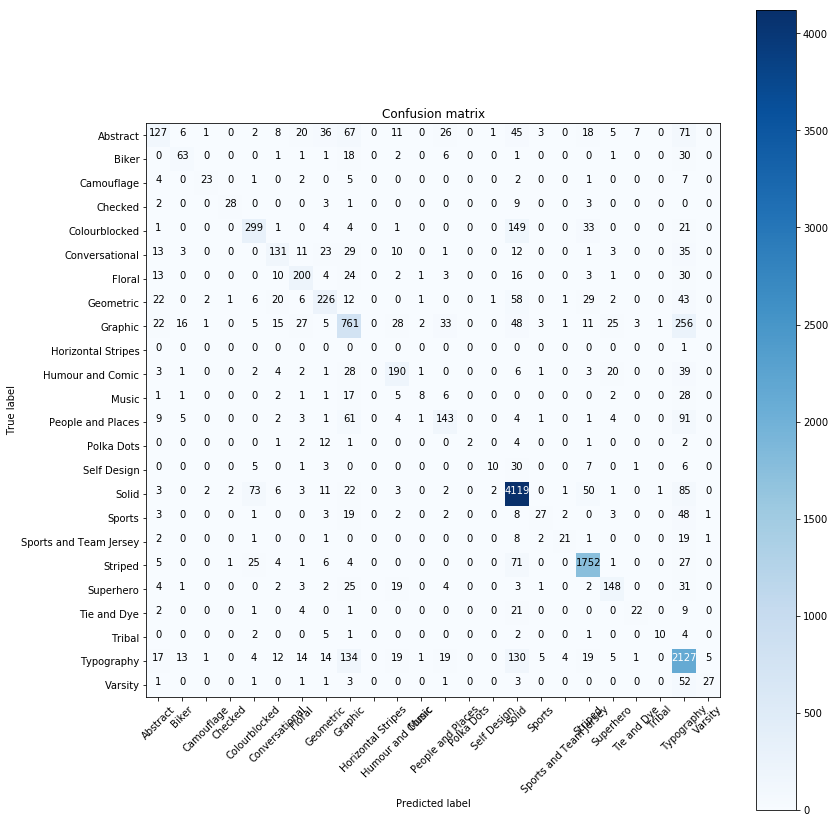

In [34]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.27974  0.01322  0.0022   0.       0.00441  0.01762  0.04405  0.0793   0.14758  0.       0.02423  0.
   0.05727  0.       0.0022   0.09912  0.00661  0.       0.03965  0.01101  0.01542  0.       0.15639  0.     ]
 [ 0.       0.50806  0.       0.       0.       0.00806  0.00806  0.00806  0.14516  0.       0.01613  0.
   0.04839  0.       0.       0.00806  0.       0.       0.       0.00806  0.       0.       0.24194  0.     ]
 [ 0.08889  0.       0.51111  0.       0.02222  0.       0.04444  0.       0.11111  0.       0.       0.       0.
   0.       0.       0.04444  0.       0.       0.02222  0.       0.       0.       0.15556  0.     ]
 [ 0.04348  0.       0.       0.6087   0.       0.       0.       0.06522  0.02174  0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.06522  0.       0.       0.       0.       0.     ]
 [ 0.00195  0.       0.       0.       0.58285  0.00195  0.       0.0078   0.0078   0.       0.00195  0.    

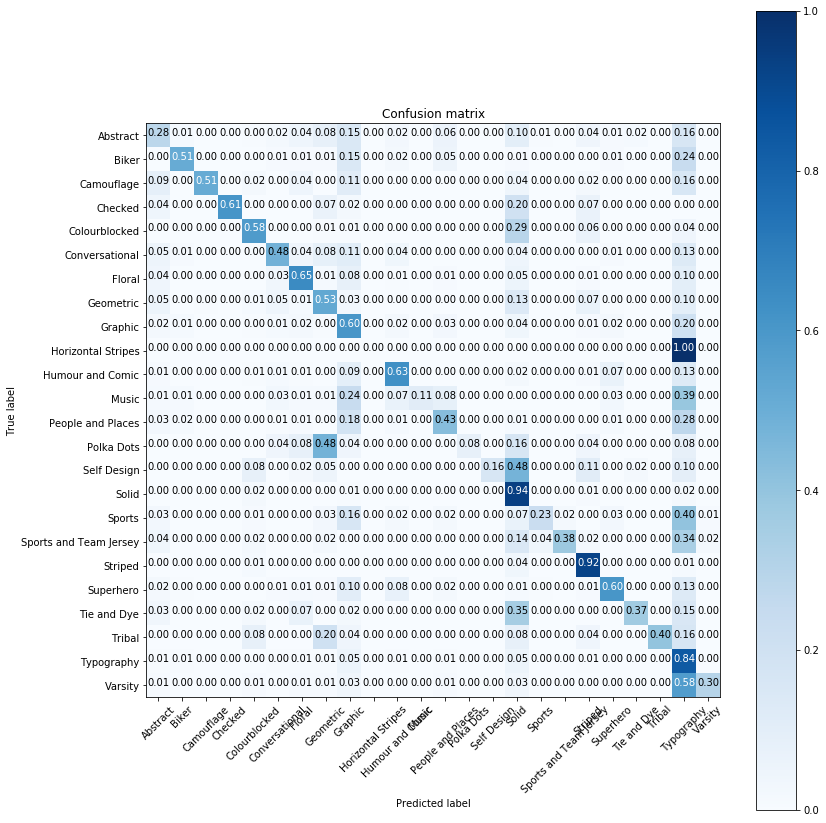

In [35]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=True)

In [36]:
learn.unfreeze()

In [37]:
learn_201.unfreeze()

In [38]:
fname = '/home/paperspace/data/hackerearth-myntra/test/11476446167866-2GO-Women-Grey-Solid-V-Neck-T-Shirt-3201476446167715-1.jpg'


In [39]:
test = open_image(fname)
test= val_tfms((test))
test.shape

(3, 320, 320)

In [40]:
pred_temp = learn.predict_array(test[None])

pred_temp = np.exp(pred_temp)
pred_temp

array([[ 0.00216,  0.00017,  0.0004 ,  0.00011,  0.00481,  0.00013,  0.00009,  0.0004 ,  0.01063,  0.00001,
         0.00116,  0.00028,  0.00192,  0.00017,  0.00022,  0.96885,  0.00029,  0.00002,  0.0005 ,  0.00011,
         0.00141,  0.00005,  0.006  ,  0.00012]], dtype=float32)

In [41]:
data.classes[np.argmax(pred_temp[0,:])]

'Solid'

In [42]:
pred_temp_201 = learn_201.predict_array(test[None])
pred_temp_201 = np.exp(pred_temp_201)
pred_temp_201

array([[ 0.00014,  0.00001,  0.00001,  0.00005,  0.0045 ,  0.00007,  0.00005,  0.00073,  0.00044,  0.     ,
         0.00009,  0.00003,  0.00011,  0.00016,  0.00038,  0.99066,  0.00007,  0.00002,  0.00046,  0.00003,
         0.00073,  0.00002,  0.00119,  0.00006]], dtype=float32)

In [43]:
data.classes[np.argmax(pred_temp_201[0,:])]

'Solid'

In [44]:
import pandas as pd

path = 'data/hackerearth-myntra'

In [45]:
df = pd.read_csv(f'myntra-submission_online-final.csv', low_memory=False)

In [46]:
df.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,NaN
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,NaN
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,NaN


In [47]:
arch=resnext50
learn_resnext = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2,opt_fn=optim.Adagrad)

100%|██████████| 428/428 [02:53<00:00,  2.46it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  1%|▏         | 24/1709 [00:01<01:25, 19.66it/s, loss=3.57]

Exception in thread Thread-56:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 87%|████████▋ | 1488/1709 [00:27<00:04, 53.23it/s, loss=5.97]


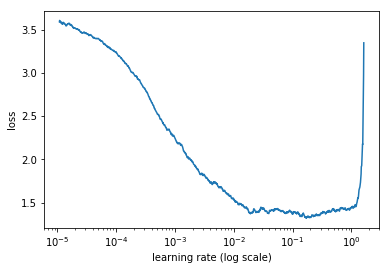

 87%|████████▋ | 1488/1709 [00:41<00:06, 36.21it/s, loss=5.97]

In [49]:
lrf = learn_resnext.lr_find()
learn_resnext.sched.plot()

In [50]:
learn_resnext.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.416629   1.289098   0.656688  
    1      1.32706    1.227278   0.669246                     
    2      1.200109   1.181593   0.676913                     
    3      1.213145   1.160828   0.681075                     
    4      1.195444   1.147527   0.681805                     



[1.1475267, 0.68180490654205606]

In [51]:
learn_resnext.fit(0.0002,20)

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.174474   1.133838   0.686186  
    1      1.126143   1.117891   0.689398                     
    2      1.140771   1.109842   0.689106                     
    3      1.151529   1.110489   0.689982                     
    4      1.113478   1.099992   0.689909                     
    5      1.114124   1.094813   0.692027                     
    6      1.143445   1.092493   0.69064                      
    7      1.097117   1.087804   0.693341                     
    8      1.090717   1.087439   0.693414                     
    9      1.082192   1.084288   0.692173                     
    10     1.098148   1.082107   0.69356                      
    11     1.088546   1.085127   0.694582                     
    12     1.10035    1.080053   0.695532                     
    13     1.107349   1.077646   0.694509                     
    14     1.103112   1.075617   0.695751                     
    15     

[1.0736513, 0.69691880841121501]

In [ ]:
learn_resnext.fit(0.005,2)

In [ ]:
learn_resnext.fit(0.001,5)

In [ ]:
learn_resnext.fit(0.0005,2)

In [ ]:
learn_resnext.fit(0.0001,2)

In [ ]:
learn_resnext.fit(0.0001,5)

In [ ]:
log_preds_resnext,y_resnext = learn_resnext.TTA()
probs_resnext = np.mean(np.exp(log_preds_resnext),0)
accuracy_np(probs_resnext, y_resnext)

In [ ]:
y_resnext[10]=9

In [ ]:
predictions_resnext = np.argmax(probs_resnext,axis=1)

In [ ]:
cm = confusion_matrix(y_resnext, predictions_resnext)

In [ ]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [ ]:
ensemble_two = probs_resnext + probs + probs_201

In [ ]:
ensemble_two[:3]

In [ ]:
ensemble_two = ensemble_two/3

In [ ]:
accuracy_np(ensemble_two,y_resnext)

In [ ]:
predictions_ensemble_two = np.argmax(ensemble_two,axis=1)

In [ ]:
predictions_ensemble

In [ ]:
cm = confusion_matrix(y_resnext, predictions_ensemble)

In [ ]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [ ]:
learn_resnext.unfreeze()

In [ ]:
for i,row in df.iterrows():
    pic_link = row['Link_to_the_image'] 
    try:
        pic_name_temp = pic_link.split('/')
        pic_name = pic_name_temp[len(pic_name_temp)-1]
        full_path_name = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
        img = val_tfms(open_image(full_path_name))
        
        pred_one = learn.predict_array(img[None])
        pred_two = learn_201.predict_array(img[None])
        pred_ensemble = (pred_one + pred_two)/2
        pred_ensemble = np.exp(pred_ensemble)
        temp_data = data.classes[np.argmax(pred_ensemble)]
        df.loc[i,'Sub_category']=temp_data
        print(str(i)+temp_data)
    except:
        print(pic_link)
        df.loc[i,'Sub_category']='Solid'

0Solid
1Solid
2Solid
3Floral
4People and Places
5Checked
6Typography
7Typography
8Solid
9Solid
10Solid
11Geometric
12Typography
13Striped
14Striped
15Typography
16Colourblocked
17Typography
18Striped
19Tie and Dye
20Solid
21Typography
22Solid
23Solid
24Conversational
25Solid
26Striped
27Solid
nan
29Solid
30Floral
31Typography
32Striped
33Striped
34Typography
35Typography
36Floral
37Solid
38Graphic
39Colourblocked
40Solid
41Conversational
42Striped
43Camouflage
44Striped
45Solid
46Colourblocked
47Typography
48Typography
49Graphic
50Typography
51Typography
52Striped
53Solid
54Solid
55Solid
56Typography
57Typography
58Solid
59Floral
60Colourblocked
61Graphic
62Typography
63Solid
64Typography
65Typography
66Colourblocked
67Floral
68Typography
69Solid
70Solid
71Typography
http://repo.karvyecom.com/image-repository/Classic/PERLE-SLT/PERLE-SLT_1.jpg
73Typography
74Striped
75Solid
76Typography
77Striped
78Solid
79Abstract
80Typography
81Solid
82Solid
83Graphic
84Striped
85Solid
86Typography
87

700Solid
701Solid
702Solid
703Solid
704Solid
705Typography
706Solid
707Striped
708Solid
709Solid
710Striped
711Typography
712Graphic
713Typography
714Typography
715Typography
716Solid
717Typography
718Striped
719Solid
720Typography
721Solid
722Solid
723Solid
724Typography
725Solid
726Typography
727Typography
728Striped
729Solid
730Solid
731Typography
732Geometric
733Striped
nan
735Solid
736Solid
737Solid
738Colourblocked
739Sports
740Geometric
741Striped
742Typography
743Solid
744Solid
745Typography
746Typography
747Solid
748Typography
749Solid
750People and Places
751Solid
752Solid
753Solid
754Superhero
755Typography
756Solid
757Tribal
758Solid
759Solid
760Floral
761Striped
762Typography
763Striped
764Solid
765Typography
766Floral
767Typography
768Typography
769Striped
770Typography
771Solid
772Solid
773Solid
774Striped
775Striped
776Typography
777Solid
778Typography
779Solid
780Typography
781Striped
782Striped
783Typography
784Typography
785Colourblocked
786Typography
787Solid
788Typ

1378Solid
1379Typography
1380Geometric
1381Solid
1382Solid
1383Solid
1384Solid
1385Solid
1386Solid
nan
1388Solid
1389Solid
1390Typography
1391Conversational
1392Solid
1393Typography
1394Typography
1395Typography
1396Striped
1397Typography
1398Typography
1399Solid
1400Superhero
1401Typography
1402Solid
1403Typography
1404Sports and Team Jersey
1405Typography
1406People and Places
1407Typography
1408Typography
1409Geometric
1410Solid
1411Solid
1412Solid
1413Geometric
1414Graphic
1415Typography
1416Solid
1417Solid
1418Solid
1419Biker
1420Solid
1421Typography
1422Typography
1423Typography
1424Solid
1425Solid
1426Striped
1427Typography
1428Floral
1429Typography
1430Solid
1431Solid
1432Solid
1433Solid
1434Graphic
1435Striped
1436Solid
1437Graphic
1438Typography
1439Striped
1440Striped
1441Typography
1442Solid
1443Solid
1444Solid
1445Typography
1446Striped
1447Typography
1448Typography
1449Solid
1450Striped
1451Typography
1452Solid
1453Solid
1454Graphic
1455Solid
nan
1457Conversational
1458So

2014Solid
2015Typography
2016Solid
2017Solid
2018Graphic
2019People and Places
2020Typography
2021Typography
2022Solid
2023Solid
2024Striped
2025Typography
2026Typography
2027Striped
2028Striped
2029Striped
2030Colourblocked
2031Solid
2032Striped
2033Typography
2034Typography
2035Solid
2036Striped
2037Checked
2038Solid
2039Typography
2040Floral
2041Floral
2042Solid
2043Solid
2044Typography
2045Typography
2046Abstract
2047Solid
2048Solid
2049Solid
2050Solid
2051Solid
2052Floral
2053Striped
2054Typography
nan
2056Striped
2057Geometric
2058Abstract
2059Solid
2060Striped
2061Typography
2062Graphic
2063Striped
2064Graphic
2065Solid
2066Abstract
2067Abstract
2068Solid
2069Typography
2070Solid
2071Solid
2072Conversational
2073Solid
2074Humour and Comic
2075Solid
2076Floral
2077Solid
2078Solid
2079Typography
2080Typography
2081Solid
2082Typography
2083Solid
2084Graphic
2085Solid
2086Solid
2087Solid
2088Solid
2089Striped
2090Graphic
2091Solid
2092Typography
2093Striped
2094Solid
2095Solid
2096T

2663Geometric
2664Solid
2665Solid
2666Solid
2667Typography
2668Colourblocked
2669Solid
2670Solid
2671Camouflage
2672Solid
2673Colourblocked
2674Typography
2675Striped
2676Colourblocked
2677Solid
2678Typography
2679Typography
2680Solid
2681Humour and Comic
2682Typography
2683Typography
2684Striped
2685Graphic
2686Solid
2687Striped
2688Striped
2689Striped
2690Striped
2691Graphic
2692Solid
2693Striped
2694Typography
2695Typography
2696Solid
2697Striped
2698Solid
2699Conversational
2700Typography
2701Typography
2702Solid
2703Solid
2704Solid
2705Solid
2706Humour and Comic
2707Typography
2708Typography
2709Solid
2710Graphic
2711Solid
2712Solid
2713Solid
2714Typography
2715Solid
2716Graphic
2717Solid
2718Typography
2719Striped
2720Graphic
2721Solid
2722Typography
2723Typography
2724Geometric
2725Colourblocked
2726Typography
2727Striped
nan
2729Solid
2730Solid
2731People and Places
https://www.dropbox.com/s/ej4fvmfcbv8v1wu/6%2C1.jpg
2733Graphic
2734Typography
2735Solid
2736Solid
2737Striped
27

3319Conversational
3320Striped
3321Floral
3322Solid
3323Colourblocked
3324Typography
3325Typography
3326Geometric
3327Typography
3328Solid
3329Solid
3330Typography
3331Solid
3332People and Places
3333Striped
3334Typography
3335Solid
3336Graphic
3337Typography
3338Typography
3339Typography
nan
3341Typography
3342Floral
3343Solid
3344Solid
3345Typography
3346Typography
3347Typography
3348Typography
3349Striped
3350Humour and Comic
3351Typography
3352Graphic
3353Striped
3354Solid
3355Striped
3356Floral
3357Typography
3358Graphic
3359Solid
3360Solid
3361Striped
3362Graphic
3363Graphic
3364Solid
3365Solid
3366Striped
3367Sports
3368Floral
3369Solid
3370Typography
http://cdn.myeshopbox.com/flipkart_images/duke-45-styles-lot24/LF2779_White/FLIPKART_2.jpg
3372Typography
3373Typography
3374Geometric
3375Solid
3376Typography
3377Solid
3378Typography
3379Graphic
3380Striped
3381Solid
3382Solid
3383Solid
3384Geometric
3385Solid
3386Striped
3387Typography
3388Solid
3389Solid
3390Striped
3391Solid
3

3948Colourblocked
3949Typography
3950Graphic
3951Typography
3952Typography
3953Colourblocked
3954Solid
3955Tie and Dye
3956Floral
3957Solid
3958Solid
3959Solid
3960Typography
3961Solid
3962Solid
3963Colourblocked
3964Humour and Comic
3965Solid
3966Solid
3967Typography
3968Solid
3969Solid
3970Conversational
3971Typography
3972Striped
3973Solid
3974Solid
3975Abstract
3976Typography
3977Solid
3978Striped
3979Solid
3980Floral
3981Solid
3982Typography
3983Solid
3984Typography
3985Solid
3986Striped
3987Superhero
3988Solid
3989Typography
3990Solid
3991Solid
3992Floral
3993Typography
3994Solid
3995Typography
nan
3997Solid
3998Solid
3999People and Places
4000Solid
4001Typography
4002Superhero
4003Solid
4004Solid
4005Solid
4006Solid
4007People and Places
4008Solid
4009Typography
4010Typography
4011People and Places
4012Striped
4013Striped
nan
4015Typography
4016Solid
4017Solid
4018Solid
4019Floral
4020Typography
4021Striped
4022Graphic
4023Typography
4024Solid
4025Typography
4026Solid
4027Solid


4592Abstract
4593Solid
4594Striped
4595Solid
4596Geometric
4597Solid
4598Solid
4599Striped
4600Solid
4601Typography
4602Typography
4603Striped
4604Typography
4605Striped
4606Graphic
4607Solid
4608Solid
4609Striped
4610Solid
4611Striped
4612Typography
4613Solid
nan
4615Striped
4616Humour and Comic
4617Striped
4618Graphic
4619Solid
4620People and Places
4621Graphic
4622Solid
4623Typography
4624Typography
4625Geometric
4626Typography
4627Typography
4628Striped
4629Striped
4630Solid
4631Solid
4632Solid
4633Solid
4634Solid
4635Typography
4636Solid
4637Typography
4638Solid
4639People and Places
4640Solid
4641Typography
4642Solid
4643Striped
4644Typography
4645Solid
4646Striped
4647Typography
4648Typography
4649Solid
4650Typography
4651Solid
4652Superhero
4653Solid
4654Solid
4655Solid
4656Solid
4657Typography
4658Humour and Comic
4659Floral
4660Solid
4661Solid
4662Typography
4663Geometric
4664Solid
4665Striped
4666Graphic
4667Striped
4668Colourblocked
4669Striped
4670Striped
4671Geometric
467

5223Solid
5224Solid
5225Geometric
5226Solid
5227Colourblocked
5228Typography
5229Solid
5230Solid
5231Typography
5232Striped
5233Typography
5234Humour and Comic
5235Solid
5236Solid
5237Solid
5238Superhero
5239Solid
5240Typography
5241Striped
5242Solid
5243Typography
5244Striped
5245Solid
5246Solid
5247Solid
5248Solid
5249Graphic
5250Floral
5251Graphic
5252Geometric
5253Geometric
5254Solid
5255Typography
5256Solid
5257Floral
5258Typography
5259Typography
5260Typography
5261Typography
5262Solid
5263Solid
5264Striped
5265Striped
5266Typography
5267Solid
5268Colourblocked
5269Typography
5270Solid
5271Striped
5272Solid
5273Solid
5274Striped
5275Solid
5276Striped
5277Solid
5278Colourblocked
5279Typography
5280Striped
5281People and Places
5282Typography
5283Typography
5284Typography
5285Typography
5286Solid
5287People and Places
5288Striped
5289Floral
5290Typography
5291Solid
5292Graphic
5293Graphic
nan
5295Solid
5296Solid
5297Striped
5298Solid
5299Solid
5300Typography
5301Solid
5302Typograph

5882Solid
5883Solid
5884People and Places
5885Solid
5886Solid
5887Typography
5888Colourblocked
5889Typography
5890Striped
5891Typography
5892Solid
5893Typography
5894Solid
5895Typography
5896Typography
5897Typography
5898Solid
5899Solid
5900Solid
5901Solid
5902Solid
5903Solid
5904Solid
5905Geometric
5906Solid
5907Typography
5908Solid
5909Solid
5910Solid
5911Solid
5912Striped
5913Typography
5914Striped
5915Typography
5916Solid
5917Solid
5918Solid
5919Biker
5920Typography
5921Solid
5922Solid
5923Conversational
5924Solid
5925Solid
5926Solid
5927Striped
5928Striped
5929Typography
5930Solid
5931Striped
5932Solid
5933Solid
5934Typography
5935Solid
5936Typography
5937Solid
5938Solid
5939Solid
5940Solid
5941Solid
5942Solid
5943Striped
5944Solid
5945Solid
5946Conversational
5947Typography
5948Solid
5949Solid
5950Solid
5951Solid
5952Solid
5953Striped
5954Striped
5955Typography
5956Striped
5957Colourblocked
5958Striped
5959Striped
5960Typography
nan
5962Typography
5963Conversational
5964Typograph

6524Solid
6525Typography
6526Typography
6527Striped
6528Typography
6529Biker
6530Striped
6531Typography
6532Superhero
6533Solid
6534Graphic
6535Solid
6536Solid
6537Typography
6538Striped
6539People and Places
6540Solid
6541Striped
6542Solid
6543Floral
6544Solid
6545Abstract
6546Striped
6547Graphic
6548Solid
6549Geometric
6550Solid
6551Typography
6552Typography
6553Graphic
6554Striped
nan
6556Typography
6557Solid
nan
6559Solid
6560Typography
6561Solid
6562Striped
6563Typography
6564Solid
6565Solid
6566Solid
6567People and Places
6568Typography
6569Striped
6570Typography
6571Striped
6572Typography
6573Striped
nan
6575Solid
6576Solid
6577Solid
6578Colourblocked
6579People and Places
6580Solid
6581Geometric
6582Typography
6583Typography
6584Typography
6585Typography
6586Solid
6587Typography
6588Typography
6589Solid
6590Solid
6591Geometric
6592Striped
6593Striped
6594Solid
6595Solid
6596Solid
6597Striped
6598Typography
6599Solid
6600Solid
6601Sports
6602Typography
6603Typography
6604Solid
6

7180Striped
7181Geometric
7182Typography
7183Striped
7184Solid
7185Typography
7186Typography
7187Colourblocked
7188Solid
7189Floral
7190Typography
7191Floral
7192Typography
7193Typography
7194Geometric
7195Solid
7196Solid
7197Solid
7198Solid
7199Conversational
7200Striped
7201Solid
7202Solid
7203Solid
7204Typography
7205Solid
7206Striped
7207Geometric
7208Solid
7209Striped
7210Superhero
nan
7212Solid
7213Solid
7214Typography
7215Conversational
7216Striped
7217Graphic
7218Solid
7219Solid
7220Abstract
7221Solid
7222Typography
7223Solid
7224Solid
7225Striped
7226Typography
7227Superhero
7228Solid
7229Solid
7230Conversational
7231Conversational
7232Typography
7233Colourblocked
7234Typography
7235Solid
7236Solid
7237Typography
7238Colourblocked
7239Solid
7240Solid
7241Striped
7242Solid
7243Typography
7244Solid
7245Solid
7246Typography
7247Striped
7248Typography
7249Solid
7250Solid
7251Striped
7252Solid
7253Typography
7254Graphic
7255Striped
7256Striped
7257Camouflage
7258Striped
7259People 

7821Solid
7822Solid
7823Typography
7824Geometric
7825Typography
7826Solid
7827Solid
7828Abstract
7829Typography
7830Typography
7831Typography
7832Typography
nan
7834Typography
7835Humour and Comic
7836Solid
7837Solid
7838Typography
7839Solid
7840Solid
7841Striped
7842Solid
7843Solid
7844Solid
7845Solid
7846Typography
7847Typography
7848Typography
7849Typography
7850Solid
7851Solid
7852Graphic
7853Typography
7854Typography
7855Typography
7856Striped
7857Solid
7858Typography
7859Floral
7860Solid
7861Typography
7862Striped
7863Solid
7864Typography
7865Striped
7866Solid
7867Solid
7868Typography
7869Typography
7870Solid
7871Striped
nan
7873Striped
7874Graphic
7875Typography
7876Typography
7877Striped
7878Solid
7879Solid
7880Typography
7881Typography
7882Striped
7883Floral
7884Typography
7885Solid
7886Solid
7887Solid
7888Typography
7889Solid
7890Graphic
7891Solid
7892Typography
7893Solid
7894Striped
7895Solid
7896Striped
7897Solid
7898Solid
7899Solid
7900Striped
7901Solid
7902Colourblocked
7

8480Humour and Comic
8481Striped
8482Solid
8483Typography
8484Graphic
8485Striped
8486Solid
8487Geometric
8488Solid
8489Typography
8490Solid
8491Typography
8492Solid
8493Typography
8494Striped
8495Solid
8496Solid
8497Solid
8498Typography
8499Solid
8500Solid
8501Solid
8502Solid
8503Humour and Comic
8504Graphic
8505Tie and Dye
8506Graphic
8507Solid
8508Solid
8509Typography
8510Abstract
8511Solid
8512Typography
8513Solid
8514Striped
8515Solid
8516Colourblocked
nan
8518Striped
8519Solid
8520Solid
8521Typography
8522Solid
8523Typography
8524Geometric
8525Solid
8526Solid
8527Colourblocked
8528Striped
8529Solid
8530Solid
8531Solid
8532Solid
8533Geometric
8534Solid
8535Typography
8536Colourblocked
8537Typography
8538Solid
8539Colourblocked
http://cdn.myeshopbox.com/flipkart_images/duke-45-styles-lot24/LF2633_White/FLIPKART_2.jpg
8541Humour and Comic
8542Typography
8543Striped
8544Solid
8545Typography
8546Solid
8547Typography
8548Typography
8549Striped
8550Striped
8551Solid
8552Conversational
8

9121Solid
9122Solid
9123Typography
9124Solid
9125Typography
9126Striped
9127Solid
9128Typography
9129Typography
9130Solid
9131Typography
9132Solid
9133Typography
9134Colourblocked
9135Solid
9136Striped
9137Graphic
9138Typography
9139Solid
9140Solid
9141Typography
9142Solid
9143Solid
nan
9145Solid
9146Solid
9147Typography
9148Solid
9149Graphic
9150Solid
9151Solid
9152Typography
9153Solid
9154Abstract
9155Typography
9156Solid
9157Solid
9158Solid
9159Striped
9160Solid
9161Solid
9162Solid
9163Solid
9164Solid
9165Solid
9166Typography
9167Striped
9168Solid
9169Colourblocked
9170Solid
9171Typography
9172Solid
9173Typography
9174Striped
9175Typography
9176Solid
9177Striped
9178Solid
9179Typography
9180Solid
9181Graphic
9182Striped
9183Typography
9184Solid
9185Solid
9186Typography
9187Geometric
9188Graphic
9189Typography
9190Solid
9191Graphic
9192Graphic
9193Solid
9194Solid
9195Checked
9196Abstract
9197Typography
9198Typography
9199Typography
9200Graphic
9201Striped
9202Solid
9203Solid
9204Typo

9770Typography
9771Typography
9772Striped
9773Solid
9774Solid
9775Solid
9776Solid
9777Typography
9778Striped
9779Graphic
9780Abstract
9781Graphic
9782Typography
9783Striped
9784Typography
9785Solid
9786Self Design
9787Humour and Comic
9788Typography
9789Graphic
9790Typography
9791Typography
9792Typography
9793Solid
9794Typography
9795Graphic
9796Solid
9797Solid
9798Solid
9799Striped
9800Graphic
9801Striped
9802Solid
9803Typography
9804Abstract
9805Typography
9806Solid
9807Solid
nan
9809Solid
9810Abstract
9811Solid
9812Abstract
9813Typography
9814Typography
9815Typography
9816Striped
9817Biker
9818Solid
9819Solid
9820Biker
9821Striped
9822Graphic
9823People and Places
9824Striped
9825Striped
9826Solid
9827Striped
9828Typography
9829Striped
9830Graphic
9831Typography
9832Solid
9833Typography
9834Graphic
9835Typography
9836Striped
9837Striped
9838Typography
9839Conversational
9840Solid
9841Typography
9842Solid
9843Typography
9844Typography
9845Solid
9846Striped
9847Solid
9848Conversationa

10391Graphic
10392Abstract
10393Typography
10394Geometric
10395Typography
10396Typography
10397Typography
10398Solid
10399Typography
10400Typography
10401Solid
10402Striped
10403Typography
10404Solid
10405Abstract
10406Striped
10407Typography
10408Typography
10409Graphic
10410Striped
10411Solid
10412Striped
10413Solid
10414Striped
10415Solid
10416Striped
10417Typography
nan
10419Typography
10420Striped
10421Typography
10422Solid
10423Graphic
10424Typography
10425Typography
10426Typography
10427Typography
10428Solid
10429Solid
10430Floral
10431Solid
10432Typography
10433Solid
10434Floral
10435Solid
10436Solid
10437Abstract
10438Striped
10439Solid
10440Solid
10441Typography
10442Solid
10443Humour and Comic
10444Solid
10445Graphic
10446Typography
10447Striped
10448Humour and Comic
10449Solid
10450Striped
10451Solid
10452Graphic
10453Abstract
10454Striped
10455Solid
10456Solid
10457Solid
10458Striped
10459Solid
10460Solid
10461Solid
10462Conversational
10463Solid
10464Floral
10465Graphic
1

10980Typography
10981Typography
10982Superhero
10983Typography
10984Solid
10985Solid
10986Geometric
10987Solid
10988Typography
10989Solid
10990Striped
10991Superhero
10992Graphic
10993Solid
10994Solid
10995Solid
10996Solid
10997Striped
10998Solid
10999Striped
11000Typography
11001Solid
11002Colourblocked
11003Superhero
11004Solid
11005People and Places
11006Striped
11007Colourblocked
nan
11009Solid
11010Typography
11011Geometric
11012Typography
11013Colourblocked
11014Striped
11015Solid
11016Typography
11017Striped
11018Colourblocked
11019Striped
11020Striped
11021Checked
11022Geometric
11023Typography
11024Typography
11025Solid
11026Solid
11027Striped
11028Colourblocked
11029Typography
11030Abstract
11031Solid
11032Typography
11033Solid
11034Typography
11035Solid
11036Solid
11037Typography
11038Typography
11039Solid
11040Typography
nan
11042Solid
11043Typography
11044Solid
11045Solid
11046Striped
11047Graphic
11048Floral
11049Striped
11050Solid
11051Typography
11052Graphic
11053Solid


11570Solid
11571Striped
11572Striped
11573Conversational
11574Striped
11575Solid
11576Solid
11577Graphic
11578Solid
11579Solid
nan
11581Graphic
11582Typography
11583Solid
11584Solid
11585Striped
11586Typography
11587Solid
11588Striped
11589Typography
11590Solid
11591Typography
11592Striped
11593Typography
11594Graphic
11595Typography
11596People and Places
11597Solid
11598Solid
11599Solid
11600Typography
11601Graphic
11602Striped
11603Typography
11604Striped
11605Solid
11606Typography
11607Typography
11608Solid
11609Typography
11610Striped
11611Solid
11612Typography
11613Solid
11614Solid
11615Solid
11616Striped
11617Typography
11618Solid
11619Striped
11620Striped
11621Typography
11622Typography
11623Striped
11624Striped
nan
11626Striped
11627Typography
11628Striped
11629Striped
11630Solid
11631Striped
11632Striped
11633Solid
11634Solid
11635Striped
11636Solid
11637Solid
11638Solid
11639Solid
11640Tribal
11641Typography
11642Solid
11643Typography
11644Solid
11645Solid
11646Graphic
11647

12185Striped
12186Typography
12187Solid
12188Typography
12189Solid
12190Solid
12191Solid
12192Striped
12193Typography
12194Solid
12195Conversational
12196Typography
12197Typography
12198Solid
12199Solid
12200Striped
12201Striped
12202Typography
12203Typography
12204Floral
12205Solid
12206Typography
12207Typography
12208Striped
12209Typography
12210Graphic
12211Graphic
12212Geometric
12213Graphic
12214Superhero
12215Geometric
12216Geometric
12217Typography
12218Typography
12219Solid
12220Geometric
12221Striped
12222Solid
12223Solid
12224Humour and Comic
12225Striped
12226Solid
12227Solid
12228Solid
12229Graphic
12230Typography
12231Solid
12232Colourblocked
12233Typography
12234Typography
12235Typography
12236Solid
12237Geometric
12238Solid
12239Solid
12240Solid
12241Striped
12242Solid
12243Typography
12244Solid
12245Striped
12246Striped
12247People and Places
12248Graphic
12249Solid
12250Solid
12251Typography
12252Typography
12253Typography
12254Solid
12255Typography
12256Solid
https://

12791Solid
12792Superhero
12793Solid
12794Typography
12795Solid
12796Typography
12797Typography
12798Solid
12799Typography
12800Solid
12801Solid
12802Solid
12803Striped
12804Solid
12805Solid
12806Graphic
12807Typography
12808Striped
12809Geometric
12810Typography
12811Camouflage
12812Typography
12813Solid
12814Striped
12815Conversational
12816Typography
12817Solid
12818Typography
12819Solid
12820Typography
12821Solid
12822Solid
12823Humour and Comic
12824Typography
12825Solid
12826Striped
12827Striped
12828Solid
12829Typography
12830Solid
12831Typography
12832Solid
12833Solid
12834Solid
12835Solid
12836Striped
12837Solid
12838Solid
12839Solid
12840Solid
12841Solid
12842Solid
12843Solid
12844Striped
12845Solid
12846Geometric
12847Solid
12848Solid
12849Solid
12850Typography
12851Typography
12852Solid
12853Solid
12854Floral
12855Solid
12856Typography
12857Solid
12858Striped
12859Striped
12860Typography
12861Striped
12862Graphic
12863Striped
12864Solid
12865Striped
12866Solid
12867Typograp

13401Typography
13402Typography
13403Striped
13404Solid
13405People and Places
13406Floral
13407Typography
13408Solid
13409Solid
13410Typography
13411Solid
13412Solid
13413Solid
13414Solid
nan
13416Striped
13417Typography
13418Tie and Dye
13419Solid
13420Solid
13421Solid
13422Solid
13423Typography
13424Typography
13425Solid
13426Solid
13427Typography
13428Typography
13429Solid
13430Solid
13431Typography
13432People and Places
13433Typography
13434Graphic
13435Typography
13436Typography
13437Solid
13438Solid
13439Abstract
13440Typography
13441Striped
13442Striped
13443Solid
13444Conversational
13445Solid
13446Striped
13447Solid
13448Geometric
13449Typography
13450Typography
13451Solid
13452Typography
13453Typography
13454Typography
13455Typography
13456Graphic
nan
13458Striped
13459Graphic
13460Solid
13461Typography
13462Striped
13463Striped
13464Colourblocked
13465Solid
13466Typography
13467Solid
13468Striped
13469Solid
13470Striped
13471Typography
13472Solid
13473Typography
13474Colou

14005Typography
14006Graphic
14007Solid
14008Striped
14009Typography
14010Typography
14011Solid
14012Striped
14013Striped
14014Solid
14015Solid
14016Colourblocked
14017Striped
14018Colourblocked
14019Striped
14020Solid
14021Solid
14022Striped
14023Solid
14024Solid
14025Solid
14026Abstract
14027Striped
14028Solid
14029Typography
14030Geometric
14031Striped
14032Typography
14033Solid
14034Typography
14035Typography
14036Solid
14037Solid
14038Solid
14039Striped
14040Solid
14041Solid
14042Solid
14043Typography
14044Solid
14045Solid
14046Typography
14047Striped
14048Striped
14049Typography
14050Striped
14051Solid
14052Solid
14053Striped
14054Solid
14055Striped
14056Typography
14057Colourblocked
14058Typography
14059Solid
14060Graphic
14061Typography
14062Solid
14063Solid
14064Striped
14065Typography
14066Striped
14067Geometric
14068Colourblocked
14069Striped
14070Striped
14071Typography
14072Solid
14073Striped
14074Typography
14075Striped
14076Striped
14077Solid
14078Graphic
14079Solid
1408

14618Colourblocked
14619Graphic
14620Solid
14621Colourblocked
14622Solid
14623Solid
nan
14625Typography
14626Solid
14627Colourblocked
14628Solid
14629Solid
14630Colourblocked
14631Striped
14632Solid
14633Colourblocked
14634Striped
14635Graphic
14636Solid
14637Solid
14638Solid
14639Typography
14640Typography
14641Solid
14642Geometric
14643Solid
14644Striped
14645Solid
14646Typography
14647Solid
14648Solid
14649Typography
14650Typography
14651Solid
14652Solid
14653Solid
14654Solid
14655Striped
14656Solid
14657Solid
14658Solid
14659Solid
14660Graphic
nan
14662Typography
14663Typography
14664Solid
nan
14666Colourblocked
14667Typography
14668Colourblocked
14669Typography
14670Solid
14671Typography
14672Solid
14673Solid
14674Striped
14675Solid
14676Solid
14677Striped
14678Striped
14679Striped
14680Typography
14681Typography
14682Typography
14683Striped
14684Typography
14685Typography
14686Striped
14687Colourblocked
14688Floral
14689Floral
14690Striped
14691Graphic
14692Solid
14693Graphic
146

In [ ]:
df.to_csv('myntra-ensemble-two.csv',index=False)